<a href="https://colab.research.google.com/github/w2k31984/challenge2_Analisis_de_Evasion_de_Clientes__Telecom/blob/master/Challenge2_Analisis_de_Evasion_de_Clientes__Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Evasión de Clientes - Telecom X**

Descripcion de la problematica: Telecom X es una empresa de telecomunicaciones actua como un analista de datos para ayudar a la empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión.

#Extracción 📁

Se extrajeron los datos del archivo JSON TelecomX_Data.json. Este archivo contiene información detallada sobre los clientes, incluyendo datos demográficos, servicios contratados, información de la cuenta y si el cliente ha cancelado o no su suscripción (churn).



1.   Importacion de las librerías necesarias para el análisis y la visualización de datos.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")


2.   Cargar los datos
Carga el archivo TelecomX_Data.json en un DataFrame de pandas



In [ ]:
# Cargar los datos desde el archivo JSON
try:
    # Cargar los datos desde el archivo JSON
    # Asegúrese de cargar primero “TelecomX_Data.json” en el entorno Colab.
    df = pd.read_json("/content/drive/MyDrive/Data_Science/Pandas/TelecomX_Data.json")
    print("Datos cargados exitosamente.")
    print("Dimensiones del DataFrame:", df.shape)

    # Mostrar las primeras filas para entender la estructura
    print("\nPrimeras 5 filas del DataFrame:")
    display(df.head())

    # Ver la información general del DataFrame
    print("\nInformación del DataFrame:")
    df.info()

except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró.")
    print("Please upload the 'TelecomX_Data.json' file to your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

Datos cargados exitosamente.
Dimensiones del DataFrame: (7267, 6)

Primeras 5 filas del DataFrame:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Transformación 🔄

3.Limpieza y preprocesamiento de los datos

In [ ]:
# --- 1. Aplanar la estructura JSON anidada ---
# Los datos de cliente, cuenta y servicios están en columnas anidadas.
# Los aplanaremos para facilitar el acceso.

df_customer = pd.json_normalize(df['customer'])
df_account = pd.json_normalize(df['account'])
df_phone_services = pd.json_normalize(df['phone'])
df_internet_services = pd.json_normalize(df['internet'])

# Unir los dataframes aplanados en uno solo
# Add customerID and Churn from the original dataframe
df_clean = pd.concat([df[['customerID', 'Churn']], df_customer, df_account, df_phone_services, df_internet_services], axis=1)

print("DataFrame aplanado y combinado:")
print(df_clean.head())


# --- 2. Manejo de valores faltantes en 'Churn' ---
# Reemplazar valores vacíos ('') en 'Churn' con NaN para poder eliminarlos fácilmente
df_clean['Churn'] = df_clean['Churn'].replace('', np.nan)
df_clean.dropna(subset=['Churn'], inplace=True)
print(f"\nRegistros después de eliminar 'Churn' vacíos: {len(df_clean)}")


# --- 3. Conversión de 'Charges.Total' a numérico ---
# La columna 'Charges.Total' es de tipo objeto y tiene espacios en blanco
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')
# Rellenar los valores nulos (que eran espacios) con 0.
# Esto asume que los clientes nuevos no tienen cargos totales.
df_clean['Charges.Total'].fillna(0, inplace=True)
print("\nValores nulos en 'Charges.Total' después de la limpieza:", df_clean['Charges.Total'].isnull().sum())


# --- 4. Transformar 'SeniorCitizen' a categórico ---
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Sí'})
print("\nValores únicos en 'SeniorCitizen' después de la transformación:")
print(df_clean['SeniorCitizen'].unique())

print("\nLimpieza y transformación completadas.")

DataFrame aplanado y combinado:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

         Contract PaperlessBilling     PaymentMethod  ...  Charges.Total  \
0        One year              Yes      Mailed check  ...          593.3   
1  Month-to-month               No      Mailed check  ...          542.4   
2  Month-to-month              Yes  Electronic check  ...         280.85   
3  Month-to-month              Yes  Electronic check  ...        1237.85   
4  Month-to-month              Yes      Mailed check  ...          267.4   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup

/tmp/ipython-input-5-3025604194.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Charges.Total'].fillna(0, inplace=True)


#Carga y Análisis Exploratorio (EDA) 🔍




4.   Elemento de la lista




Validaremos primero, la proporcion de clientes que ha cancelado el servicio.

/tmp/ipython-input-13-1692034687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_clean, palette='ocean')


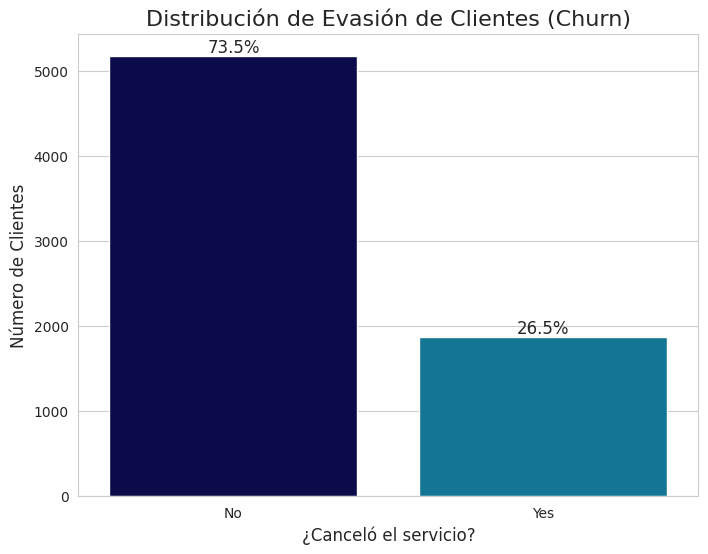

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_clean, palette='ocean')
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=16)
plt.xlabel('¿Canceló el servicio?', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Añadir porcentajes en las barras
total = len(df_clean)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()



5.Análisis por perfil demográfico del cliente




Analicemos cómo se relaciona la evasión con las características demográficas.

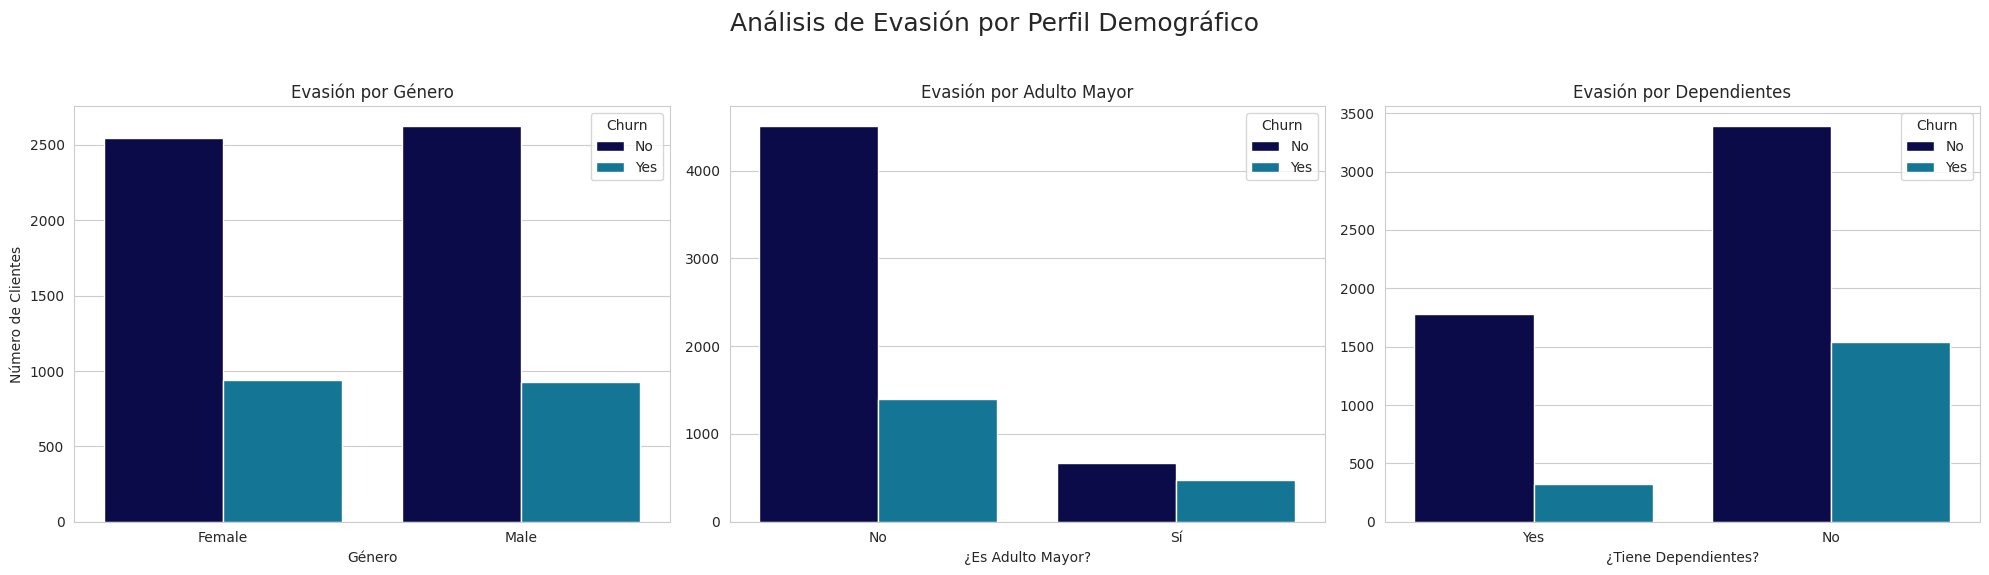

In [ ]:
# Gráficos para analizar el churn por variables demográficas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análisis de Evasión por Perfil Demográfico', fontsize=18)

# Género
sns.countplot(ax=axes[0], x='gender', hue='Churn', data=df_clean, palette='ocean')
axes[0].set_title('Evasión por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Número de Clientes')

# Adulto Mayor (Senior Citizen)
sns.countplot(ax=axes[1], x='SeniorCitizen', hue='Churn', data=df_clean, palette='ocean')
axes[1].set_title('Evasión por Adulto Mayor')
axes[1].set_xlabel('¿Es Adulto Mayor?')
axes[1].set_ylabel('')

# Dependientes
sns.countplot(ax=axes[2], x='Dependents', hue='Churn', data=df_clean, palette='ocean')
axes[2].set_title('Evasión por Dependientes')
axes[2].set_xlabel('¿Tiene Dependientes?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


6.Análisis por tipo de contrato y facturación

El tipo de contrato y el método de pago son factores clave.

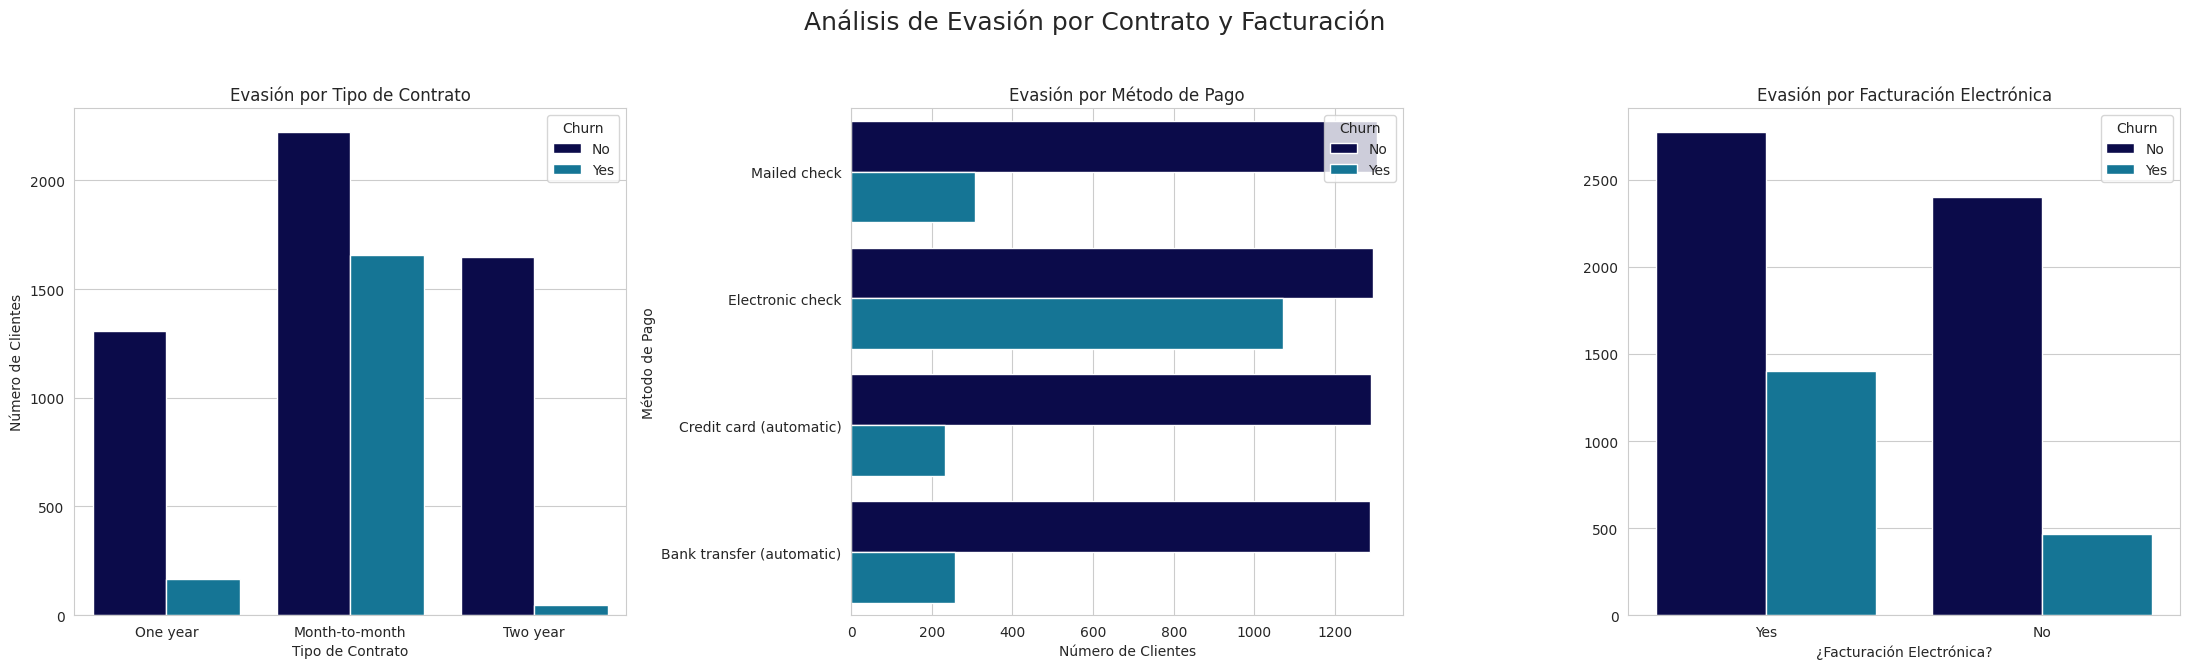

In [ ]:
# Gráficos para analizar el churn por tipo de contrato y facturación
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Análisis de Evasión por Contrato y Facturación', fontsize=18)

# Tipo de Contrato
sns.countplot(ax=axes[0], x='Contract', hue='Churn', data=df_clean, palette='ocean')
axes[0].set_title('Evasión por Tipo de Contrato')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Número de Clientes')

# Método de Pago
sns.countplot(ax=axes[1], y='PaymentMethod', hue='Churn', data=df_clean, palette='ocean')
axes[1].set_title('Evasión por Método de Pago')
axes[1].set_xlabel('Número de Clientes')
axes[1].set_ylabel('Método de Pago')

# Facturación sin papel (Paperless Billing)
sns.countplot(ax=axes[2], x='PaperlessBilling', hue='Churn', data=df_clean, palette='ocean')
axes[2].set_title('Evasión por Facturación Electrónica')
axes[2].set_xlabel('¿Facturación Electrónica?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

7.Análisis por servicios contratados (Internet)

Investiguemos si el tipo de servicio de internet y los servicios adicionales influyen.

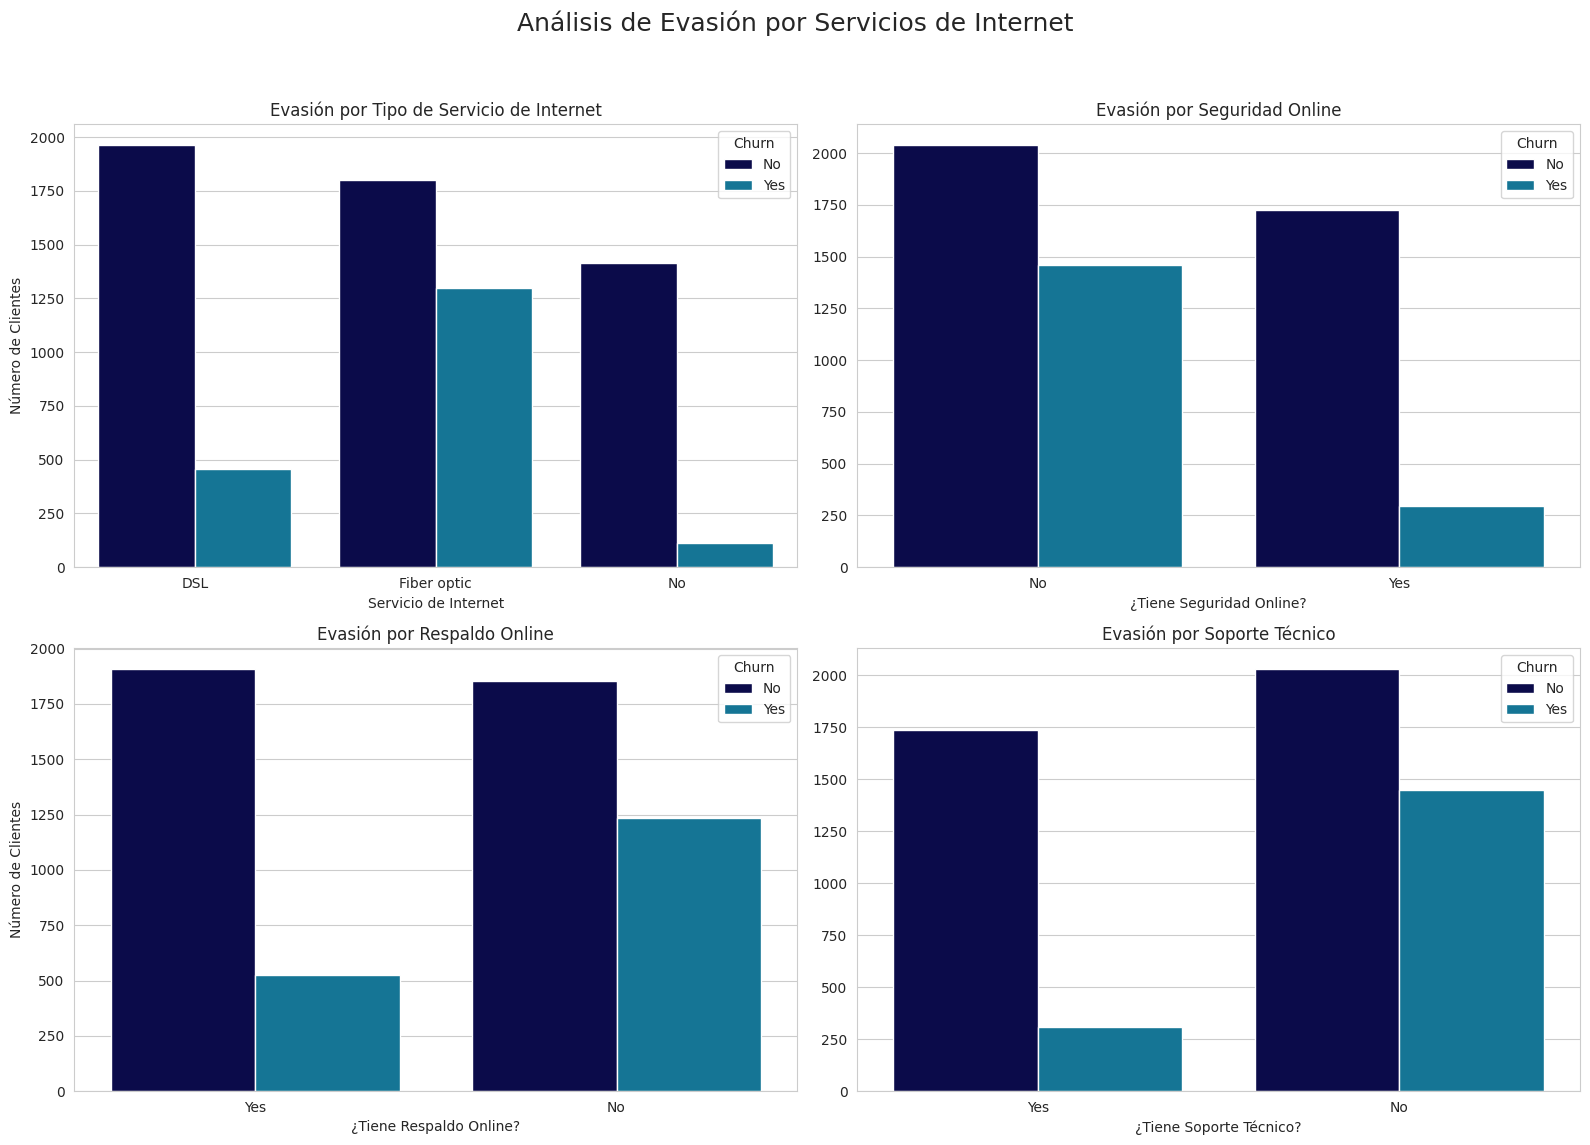

In [ ]:
# Filtrar solo clientes con servicio de internet para analizar servicios adicionales
internet_customers = df_clean[df_clean['InternetService'] != 'No']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Evasión por Servicios de Internet', fontsize=18)

# Tipo de Servicio de Internet
sns.countplot(ax=axes[0, 0], x='InternetService', hue='Churn', data=df_clean, palette='ocean')
axes[0, 0].set_title('Evasión por Tipo de Servicio de Internet')
axes[0, 0].set_xlabel('Servicio de Internet')
axes[0, 0].set_ylabel('Número de Clientes')

# Seguridad Online
sns.countplot(ax=axes[0, 1], x='OnlineSecurity', hue='Churn', data=internet_customers, palette='ocean')
axes[0, 1].set_title('Evasión por Seguridad Online')
axes[0, 1].set_xlabel('¿Tiene Seguridad Online?')
axes[0, 1].set_ylabel('')

# Respaldo Online
sns.countplot(ax=axes[1, 0], x='OnlineBackup', hue='Churn', data=internet_customers, palette='ocean')
axes[1, 0].set_title('Evasión por Respaldo Online')
axes[1, 0].set_xlabel('¿Tiene Respaldo Online?')
axes[1, 0].set_ylabel('Número de Clientes')

# Soporte Técnico
sns.countplot(ax=axes[1, 1], x='TechSupport', hue='Churn', data=internet_customers, palette='ocean')
axes[1, 1].set_title('Evasión por Soporte Técnico')
axes[1, 1].set_xlabel('¿Tiene Soporte Técnico?')
axes[1, 1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

8.Análisis por cargos mensuales y totales.

Finalmente, veamos la relación entre los montos facturados y la evasión.

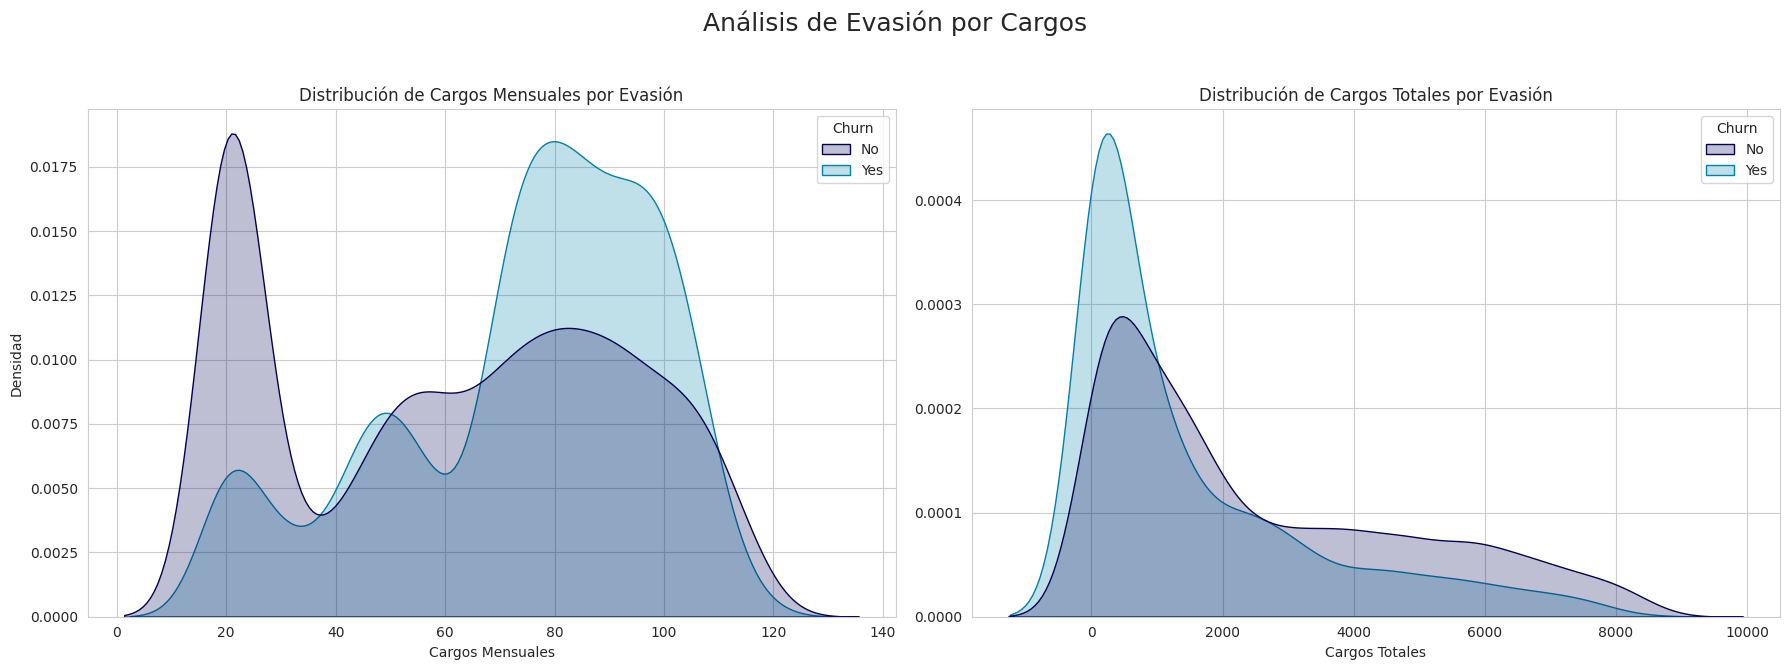

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análisis de Evasión por Cargos', fontsize=18)

# Cargos Mensuales (MonthlyCharges)
sns.kdeplot(ax=axes[0], x='Charges.Monthly', hue='Churn', data=df_clean, fill=True, common_norm=False, palette='ocean')
axes[0].set_title('Distribución de Cargos Mensuales por Evasión')
axes[0].set_xlabel('Cargos Mensuales')
axes[0].set_ylabel('Densidad')

# Cargos Totales (TotalCharges)
sns.kdeplot(ax=axes[1], x='Charges.Total', hue='Churn', data=df_clean, fill=True, common_norm=False, palette='ocean')
axes[1].set_title('Distribución de Cargos Totales por Evasión')
axes[1].set_xlabel('Cargos Totales')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Informe Final ✅

**Conclusiones del Análisis Exploratorio**

Basado en la visualización de los datos, los principales indicadores de una posible evasión de clientes son:

1.  **Tipo de Contrato**: Los clientes con **contratos de mes a mes** tienen una tasa de cancelación drásticamente superior. Esta es la variable predictora más fuerte.
2.  **Servicio de Internet**: Los clientes con **Fibra Óptica** son mucho más propensos a cancelar, lo que podría señalar problemas de precio, calidad o expectativas no cumplidas con este servicio.
3.  **Método de Pago**: El pago con **Cheque Electrónico** está fuertemente correlacionado con la evasión.
4.  **Servicios de Protección y Soporte**: La ausencia de servicios como **Seguridad Online, Respaldo Online y Soporte Técnico** aumenta la probabilidad de evasión en clientes con servicio de internet.
5.  **Cargos Mensuales**: Cargos mensuales más altos, especialmente alrededor de los $70-$100, muestran una mayor densidad de clientes que cancelan.
6.  **Perfil Demográfico**: Los **adultos mayores (Senior Citizens)** y los clientes **sin pareja o dependientes** son más propensos a la evasión.



Basado en el análisis exploratorio de los datos, se han identificado varios factores clave que parecen estar correlacionados con una mayor tasa de evasión de clientes en Telecom X.

**Principales Hallazgos:**

*   **Contratos a Corto Plazo**: El factor más influyente en la evasión de clientes es el tipo de contrato. Los clientes con contratos de mes a mes son mucho más propensos a cancelar el servicio.
*   **Servicio de Fibra Óptica**: A pesar de ser un servicio premium, los clientes con fibra óptica muestran una tasa de evasión muy alta. Esto podría indicar problemas de calidad, precio o expectativas no cumplidas con este servicio.
*   **Cheque Electrónico como Método de Pago**: El uso de cheque electrónico como método de pago está fuertemente asociado con la evasión. Esto podría estar relacionado con problemas en el proceso de pago o con el perfil de cliente que prefiere este método.
*   **Clientes sin Servicios de Soporte y Seguridad**: La falta de servicios de valor agregado como soporte técnico, seguridad y respaldo en línea parece ser un indicador de riesgo de evasión.
*   **Perfil del Cliente**: Clientes adultos mayores, solteros y sin dependientes son más propensos a la evasión.


**Recomendaciones**

Luego de esto podemos recomendar:

*   **Servicios y Contratos**
    *   **Servicio Telefónico y Múltiples Líneas**: La evasión es ligeramente mayor en clientes con múltiples líneas telefónicas.
    *   **Servicio de Internet**: Los clientes con servicio de fibra óptica tienen una tasa de evasión significativamente más alta en comparación con aquellos que tienen DSL o no tienen servicio de internet.
    *   **Servicios Adicionales de Internet**: Clientes sin servicios de respaldo en línea (OnlineBackup), seguridad en línea (OnlineSecurity) y soporte técnico (TechSupport) muestran una mayor propensión a la evasión.
    *   **Tipo de Contrato**: La evasión es drásticamente más alta entre los clientes con contratos de mes a mes en comparación con los contratos de uno o dos años.

*   **Facturación y Pagos**
    *   **Facturación Electrónica (PaperlessBilling)**: Los clientes que utilizan facturación electrónica tienen una mayor tasa de evasión.
    *   **Método de Pago**: Los clientes que pagan con cheque electrónico (Electronic check) tienen la tasa de evasión más alta en comparación con otros métodos de pago.
    *   **Cargos Mensuales y Totales**: Se observa una tendencia donde a mayores cargos mensuales, mayor es la probabilidad de evasión.
    
**Recomendaciones para el Equipo de Ciencia de Datos:**

Se recomienda que el equipo de ciencia de datos profundice en estos hallazgos para construir un modelo predictivo de evasión. Sugerimos las siguientes acciones:

*   **Análisis de Sentimiento**: Si se dispone de datos de texto (ej. encuestas de satisfacción, transcripciones de llamadas), realizar un análisis de sentimiento para entender mejor la insatisfacción de los clientes, especialmente aquellos con fibra óptica.
*   **Ingeniería de Características**: Crear nuevas variables que puedan capturar de manera más efectiva el comportamiento del cliente. Por ejemplo, una variable que combine el tipo de contrato con el método de pago.
*   **Modelado Predictivo**: Utilizar los factores identificados como variables predictoras en modelos de clasificación para predecir la probabilidad de evasión de un cliente.